# Импортируем необходимые библиотеки

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pickle
import pytest

# Создаём датасет

In [59]:
x_1 = np.linspace(0, 10, 100)
y_1  = x_1 + np.random.random(100)*2 - 1
df_1 = pd.DataFrame(x_1, columns=['feature'])

x_2 = np.linspace(0, 10, 100)
y_2  = x_2 + np.random.random(100)*2 - 1
df_2 = pd.DataFrame(x_2, columns=['feature'])

x_3 = np.linspace(0, 10, 100)
y_3  = x_3 + np.random.random(100)*2 - 1
df_3 = pd.DataFrame(x_3, columns=['feature'])

## Визуализация датасетов

In [60]:
plt.style.use('ggplot')

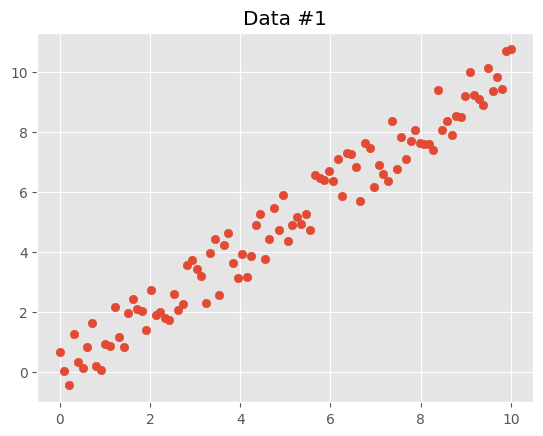

In [61]:

plt.scatter(x_1, y_1)
plt.title("Data #1")
plt.show()

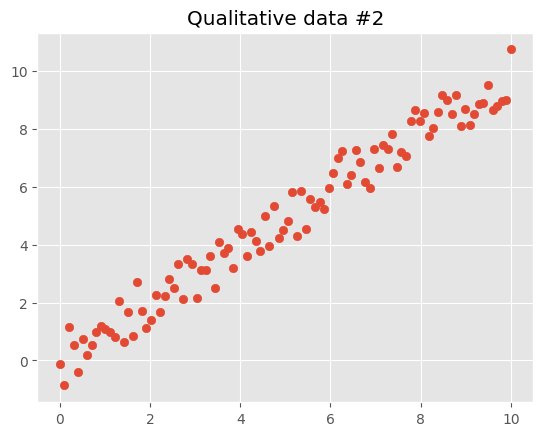

In [62]:
plt.scatter(x_2, y_2)
plt.title("Qualitative data #2")
plt.show()

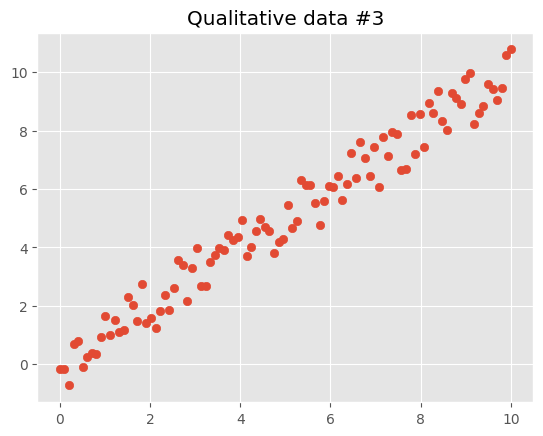

In [63]:
plt.scatter(x_3, y_3)
plt.title("Qualitative data #3")
plt.show()

### Добавление шумов

In [64]:
p_x = np.linspace(0, 100, 100)
p_y  = p_x + np.random.random(100)*20 - 10
p_y[10:30] *= 2
p_y[60:80] /= 2

df_p = pd.DataFrame(p_x, columns=['feature'])

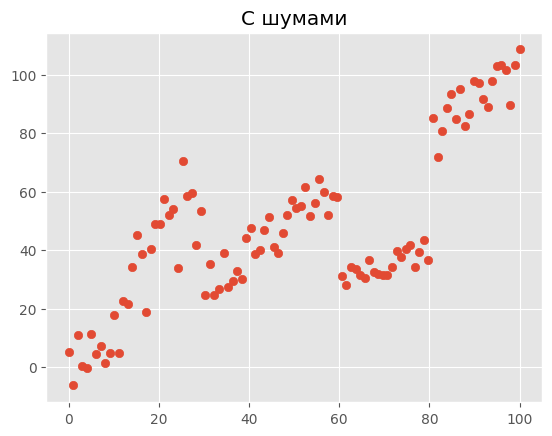

In [65]:
plt.scatter(p_x, p_y)
plt.title("С шумами")
plt.show()
     

# Создание и обучение модели

In [66]:
def process(df, y):
    # scale data
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    # Create and fit model
    model = LinearRegression()
    model.fit(X, y)
    return model

In [67]:
model = process(df_1, y_1)

## Сохранение датасета и модели 

In [68]:
pickle.dump(model, open("model.pkl", 'wb'))

df_1.to_csv("df1.csv", index=False)
pd.DataFrame(y_1, columns=['target']).to_csv("target1.csv", index=False)

df_2.to_csv("df2.csv", index=False)
pd.DataFrame(y_2, columns=['target']).to_csv("target2.csv", index=False)

df_3.to_csv("df3.csv", index=False)
pd.DataFrame(y_3, columns=['target']).to_csv("target3.csv", index=False)

df_p.to_csv("dfp.csv", index=False)
pd.DataFrame(p_y, columns=['target']).to_csv("targetp.csv", index=False)

In [74]:
%%writefile pytest_script.py
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
df_1 = pd.read_csv("df1.csv")
df_2 = pd.read_csv("df2.csv")
df_3 = pd.read_csv("df3.csv")
y_1 = pd.read_csv("target1.csv")
y_2 = pd.read_csv("target2.csv")
y_3 = pd.read_csv("target3.csv")

df_p = pd.read_csv("dfp.csv")
y_p = pd.read_csv("targetp.csv")

def get_metrics(target, predictions):
    MAE = mean_absolute_error(target, predictions)
    RMSE = np.sqrt(mean_squared_error(target, predictions))
    return MAE, RMSE


def print_metrics(MAE, RMSE):
    print(f"MAE : {MAE:.4f}")
    print(f"RMSE : {RMSE:.4f}")


def test_second_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_2, rmse_2 = get_metrics(y_2, model.predict(df_2))
    assert abs(mae_standard - mae_2) < 1 and abs(rmse_standard - rmse_2) < 1


def test_third_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_3, rmse_3 = get_metrics(y_3, model.predict(df_3))
    assert abs(mae_standard - mae_3) < 1 and abs(rmse_standard - rmse_3) < 1


def test_poor_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_p, rmse_p = get_metrics(y_p, model.predict(df_p))
    assert abs(mae_standard - mae_p) > 10 and abs(rmse_standard - rmse_p) > 10


Writing pytest_script.py


In [76]:
!pytest -v pytest_script.py

============================= test session starts =============================
platform win32 -- Python 3.11.2, pytest-8.0.2, pluggy-1.4.0 -- C:\Users\Kirill\AppData\Local\Programs\Python\Python311\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Kirill\OneDrive\Рабочий стол\GitHub\ML_Ops\MLOps_hw\lib5
plugins: anyio-4.3.0, hydra-core-1.3.2, time-machine-2.14.1
collecting ... collected 3 items

pytest_script.py::test_second_model PASSED                               [ 33%]
pytest_script.py::test_third_model PASSED                                [ 66%]
pytest_script.py::test_poor_model PASSED                                 [100%]

============================== warnings summary ===============================
pytest_script.py::test_second_model
pytest_script.py::test_second_model
pytest_script.py::test_third_model
pytest_script.py::test_third_model
pytest_script.py::test_poor_model
pytest_script.py::test_poor_model
  C:\Users\Kirill\AppData\Local\Programs\Python\Python311\Lib\site